In [9]:
!pip install kagglehub[pandas-datasets]

Реализовать минимум 5 классификаторов, сравнить метрики между собой, выбрать лучший для Вашего датасета.
7.	Обучите модель на наборе данных Heart Disease для предсказания наличия сердечных заболеваний. Визуализируйте дерево решений и проанализируйте его структуру.

In [1]:
import kagglehub
import pandas as pd

# Загрузка датасета с сайта https://www.kaggle.com/
file_path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
print(file_path)

import sys
sys.path.append(file_path)
path = file_path+'/heart.csv'
import csv

# Функция загрузки данных
def load_csv_file(file_path):
  try:
    csv_file = pd.read_csv(file_path)
    print("Данные успешно загружены.")
    return csv_file
  except FileNotFoundError as e:
        print(f"Ошибка при загрузке данных: {e}")
        sys.exit(1)

# Загрузка данных и просмотр первых 5 записей
heart_data = load_csv_file(path)
print("First 5 records:", heart_data.head())

/root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2
Данные успешно загружены.
First 5 records:    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [11]:
# Информация о типах данных
print(heart_data.info())

# Статистическая информация
print(heart_data.describe())

# Проверка баланса классов
print("Распределения класса")
print(heart_data['target'].value_counts(normalize=True))

# Проверка на пропущенные значения
print("Пропуск значений")
print(heart_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [ ]:
# Классификатор CatBoost.
!pip install catboost

In [73]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import time

# Разделение на признаки и целевую переменную
X = heart_data.drop('target', axis=1)  # Все столбцы, кроме target
y = heart_data['target']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

classifiers = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Cat Boost Classifier": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Light Gradient Boosting Machine": lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100),
    "SVC": SVC(kernel='poly', random_state=42)
}

inform_classifiers = {}
# Функция обучения классификаторов
def classifier_compare(classifier):
  for name, modclassifierel in classifier.items():
    try:
      # Время начала обучения
      time_start = time.time()

      # Создание и обучение классификатора
      clf = modclassifierel
      clf.fit(X_train, y_train)

      # Время обучения
      times = time.time() - time_start

      # Прогнозирование и оценка точности
      y_pred = clf.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      conf_matrix = confusion_matrix(y_test, y_pred)
      recall = recall_score(y_test, y_pred, average='weighted')
      precision = precision_score(y_test, y_pred, average='weighted', zero_division=np.nan)

      # Информация для сравнения классификаторов
      inform_classifiers[name] = {
        "Name": name,
        "Confusion matrix": conf_matrix,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "Time (s)": times
      }
    except Exception as e:
          print(f"Ошибка при обучение классификатора {name}: {e}")
          continue
classifier_list = []
def inform_classifier():
  best_accuracy = 0
  name_classifier_acc = ""
  for name, classifier in inform_classifiers.items():
    print(f'Классификатор: {classifier["Name"]}')
    print(f'Accuracy: {classifier["Accuracy"]:.3f}')
    print(f'Confusion matrix: {classifier["Confusion matrix"]}')
    print(f'Recall: {classifier["Recall"]}')
    print(f'Precision: {classifier["Precision"]}')
    print(f'Time (s): {classifier["Time (s)"]:.3f}\n')
    if best_accuracy < classifier["Accuracy"]:
      best_accuracy = classifier["Accuracy"]
      name_classifier_acc = classifier["Name"]
    classifier_list.append([name, classifier["Accuracy"], classifier["Recall"], classifier["Precision"]])
  print(f'Лучшая точнойсть у модели: {name_classifier_acc} - {best_accuracy:.3f}\n')

classifier_compare(classifiers)
inform_classifier()

[LightGBM] [Info] Number of positive: 368, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 717, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513250 -> initscore=0.053011
[LightGBM] [Info] Start training from score 0.053011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[


Результаты всех моделей:
                              Name  Accuracy    Recall  Precision
0                Gradient Boosting  0.964286  0.964286   0.964299
1             Cat Boost Classifier  0.902597  0.902597   0.902935
2  Quadratic Discriminant Analysis  0.837662  0.837662   0.837662
3  Light Gradient Boosting Machine  0.980519  0.980519   0.980519
4                              SVC  0.737013  0.737013   0.737193


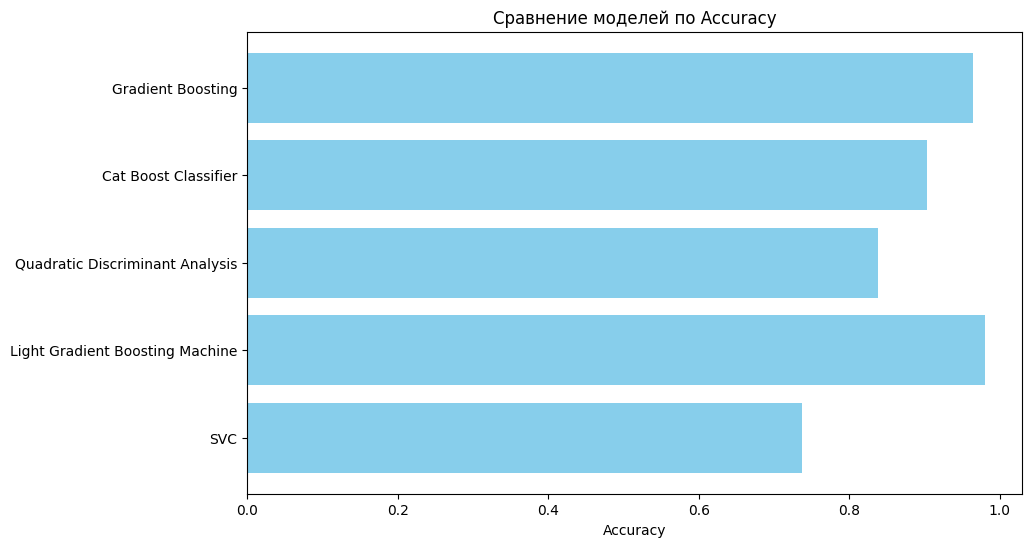

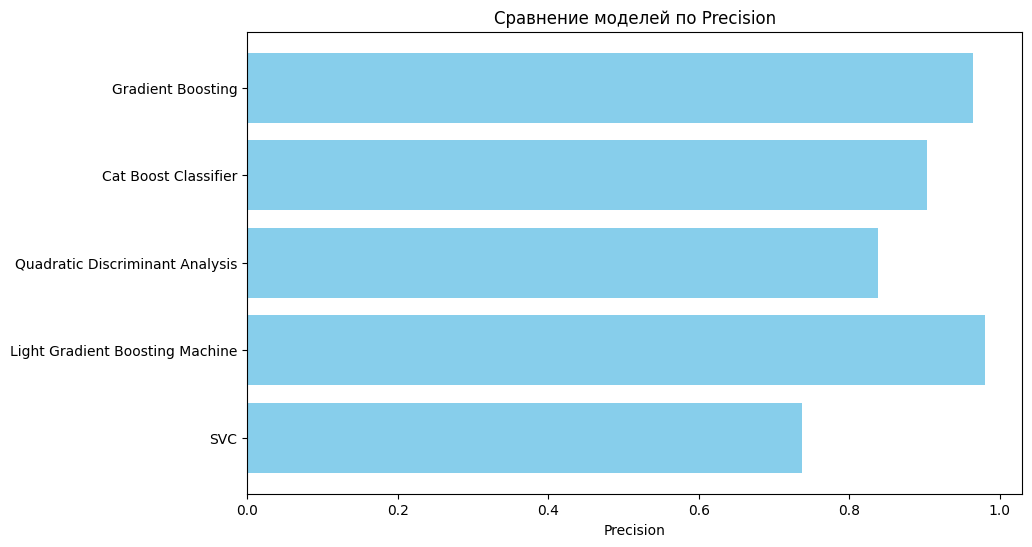

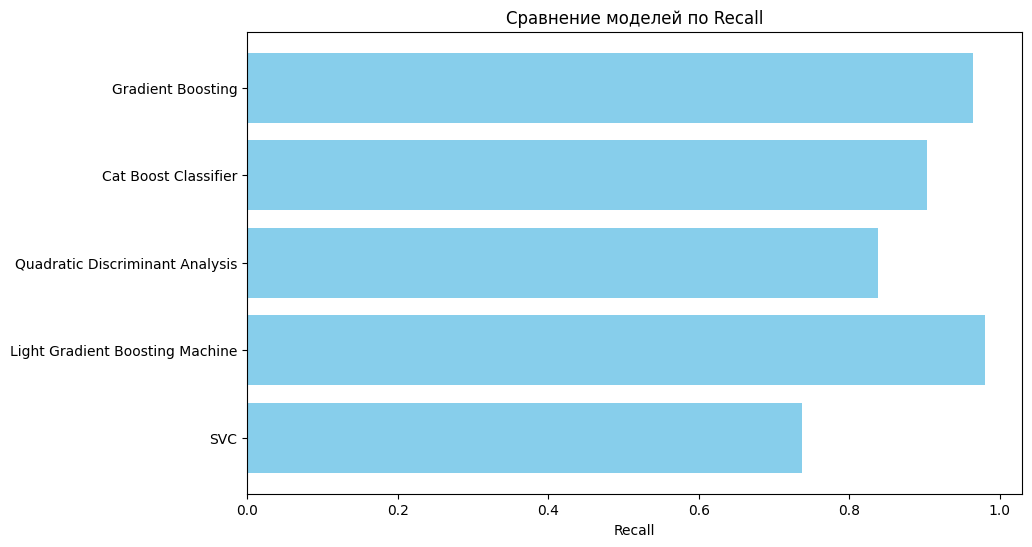

In [75]:
# Визуализация по всем метрикам

classifier_df = pd.DataFrame(classifier_list, columns=['Name', 'Accuracy',  'Recall', 'Precision'])
print("\nРезультаты всех моделей:")
print(classifier_df)


metrics = ['Accuracy', 'Precision', 'Recall']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.barh(classifier_df['Name'], classifier_df[metric], color='skyblue')
    plt.xlabel(metric)
    plt.title(f'Сравнение моделей по {metric}')
    plt.gca().invert_yaxis()
    plt.savefig(f'model_comparison_{metric.lower()}.png')
    plt.show()


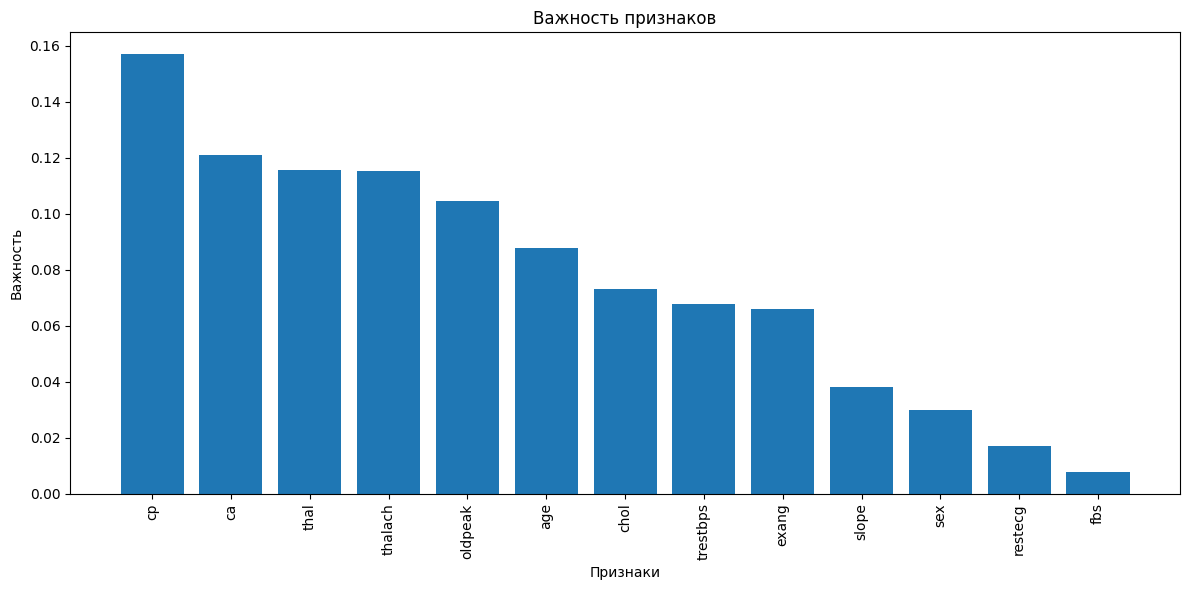

Важность признаков:
Признак cp, важность: 0.1569084036540061
Признак ca, важность: 0.12105686297158959
Признак thal, важность: 0.11561827259371345
Признак thalach, важность: 0.11526611319260886
Признак oldpeak, важность: 0.10447859042876936
Признак age, важность: 0.08758719313660973
Признак chol, важность: 0.07315626490149187
Признак trestbps, важность: 0.06759999563096038
Признак exang, важность: 0.06589610937973221
Признак slope, важность: 0.038049635468209
Признак sex, важность: 0.029845016723028663
Признак restecg, важность: 0.016943729140073985
Признак fbs, важность: 0.0075938127792069526


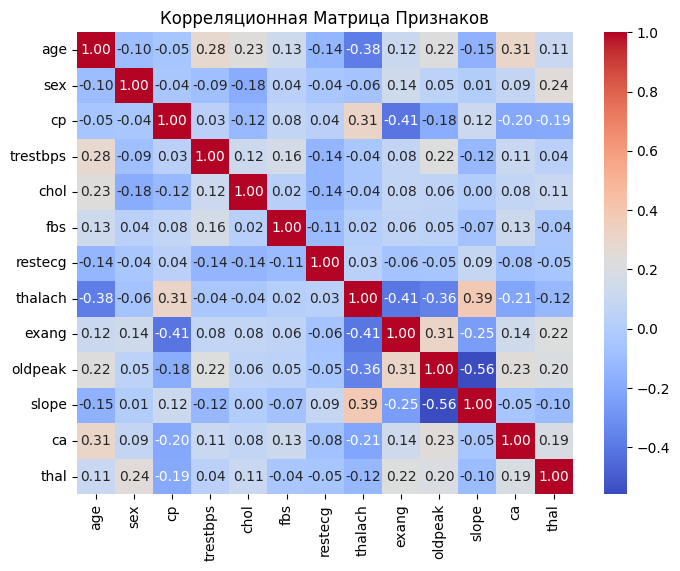

Accuracy: 0.981
Confusion Matrix:
 [[147   3]
 [  3 155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       150
           1       0.98      0.98      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



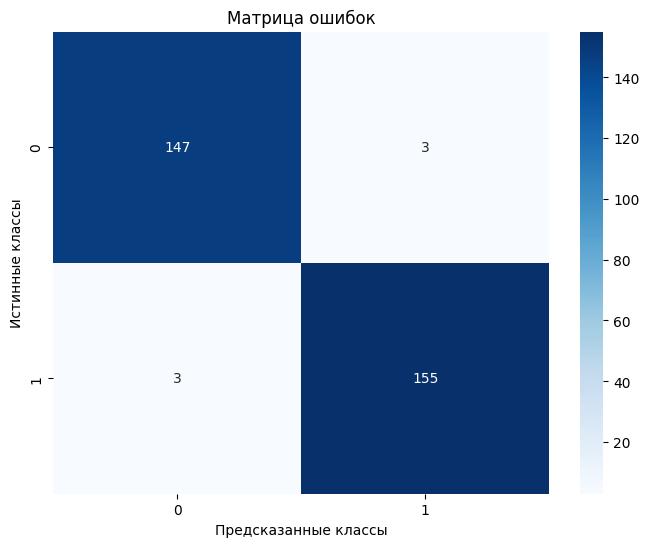

In [69]:
# Создадим и обучим модель Random Forest Classifier с дополнительными настройками
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# Визуализация важности признаков
feature_names = heart_data.drop('target', axis=1)
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names.columns)[indices], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
plt.show()

# Вывод важности признаков
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Важность признаков:")
for idx in indices:
    print(f"Признак {feature_names.columns[idx]}, важность: {importances[idx]}")

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Создание DataFrame из масштабированных данных для удобства
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Корреляционная Матрица
corr_matrix = X_train_scaled_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная Матрица Признаков')
plt.show()

# Сделаем предсказания на тестовом наборе данных
y_pred = rf_classifier.predict(X_test)

# Оценим качество модели
accuracyRF = accuracy_score(y_test, y_pred)
conf_matrixRF = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracyRF:.3f}')
print("Confusion Matrix:\n", conf_matrixRF)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
target_names = heart_data['target'].unique()
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrixRF, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

Accuracy: 0.889
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



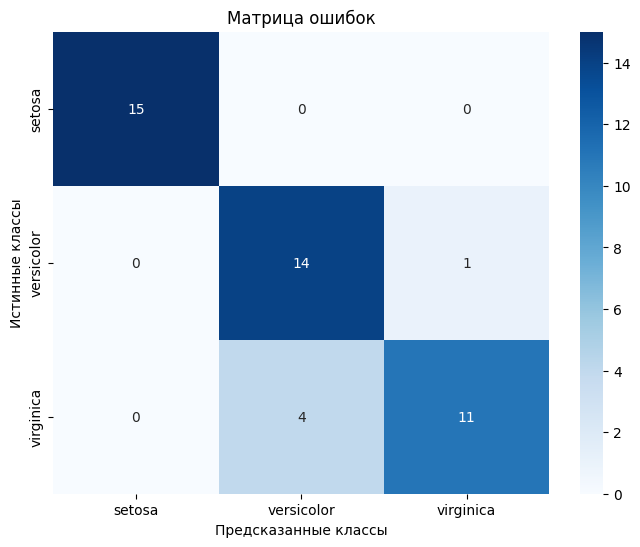

In [70]:
# Добавим пример для CatBoost на датасете ирисы
from sklearn.datasets import load_iris

# Загрузка данных
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Создание и обучение классификатора CatBoost
clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0)
clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Оценим качество модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

Accuracy: 0.854
Confusion Matrix:
 [[124  26]
 [ 19 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       150
           1       0.84      0.88      0.86       158

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



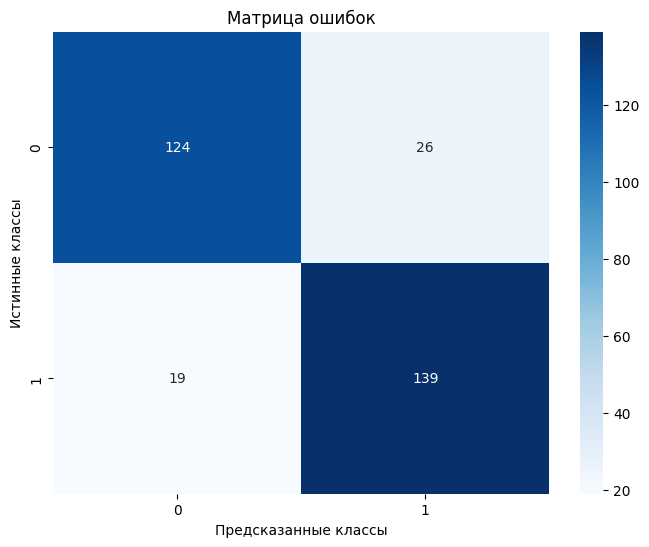

In [71]:
# Классификатор AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Разделение на признаки и целевую переменную
X = heart_data.drop('target', axis=1)  # Все столбцы, кроме target
y = heart_data['target']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Создание и обучение классификатора AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_classifier = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_classifier.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе данных
y_pred = ada_classifier.predict(X_test)

# Оценим качество модели
accuracyAB = accuracy_score(y_test, y_pred)
conf_matrixAB = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracyAB:.3f}')
print("Confusion Matrix:\n", conf_matrixAB)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
target_names = heart_data['target'].unique()
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrixAB, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': 10, 'max_features': None, 'min_samples_split': 6, 'n_estimators': 150}
Лучшая точность (CV): 0.9846930846930848
Accuracy: 0.981
Confusion Matrix:
 [[147   3]
 [  3 155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       150
           1       0.98      0.98      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



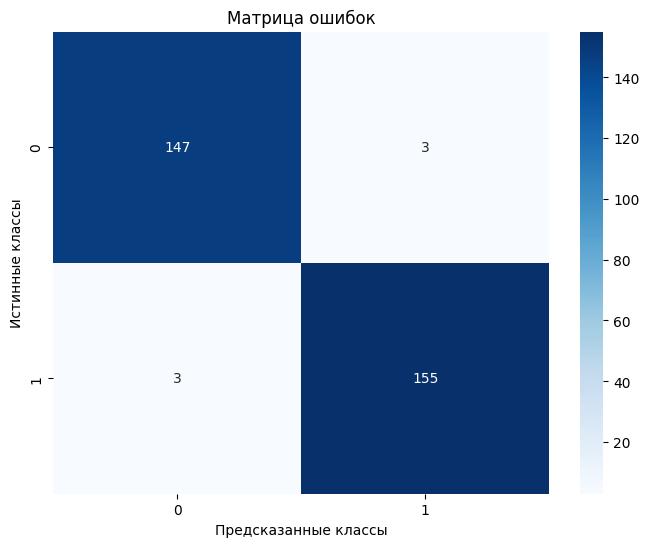

In [ ]:
# Классификатор ExtraTrees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Разделение на признаки и целевую переменную
X = heart_data.drop('target', axis=1)  # Все столбцы, кроме target
y = heart_data['target']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Создание и обучение классификатора Extra Trees с использованием GridSearchCV для подбора гиперпараметров
param_grid = {
    'n_estimators': [125, 150, 175],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 7, 10, 12],
    'min_samples_split': [6, 7, 8]
}
# Инициализация ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Использование лучшей модели для прогнозирования
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Оценим качество модели
accuracyET = accuracy_score(y_test, y_pred)
conf_matrixET = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracyET:.3f}')
print("Confusion Matrix:\n", conf_matrixET)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
target_names = heart_data['target'].unique()
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrixET, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

Accuracy: 0.737
Confusion Matrix:
 [[ 80  70]
 [ 11 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.53      0.66       150
           1       0.68      0.93      0.78       158

    accuracy                           0.74       308
   macro avg       0.78      0.73      0.72       308
weighted avg       0.78      0.74      0.73       308



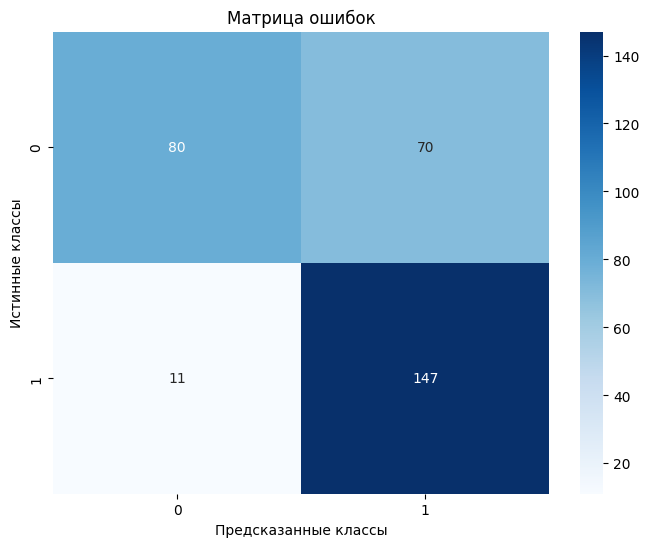

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


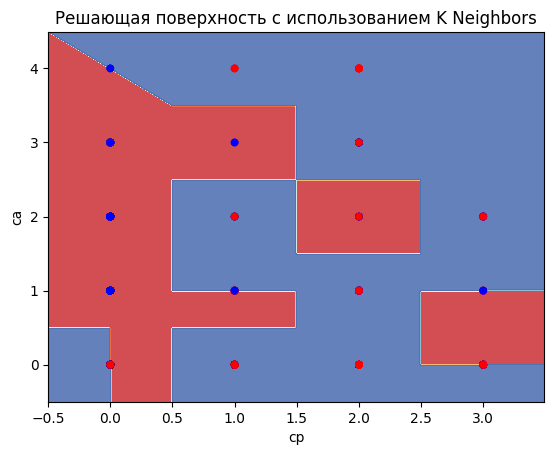

In [ ]:
# Классификатор K Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Разделение на признаки и целевую переменную
X = heart_data[['cp', 'ca']] # Берем только два признака (cp и ca)
y = heart_data['target']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Создание и обучение модели K Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # Задаем количество соседей (K=3)
knn.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn.predict(X_test)

# Оценим качество модели
accuracyKN = accuracy_score(y_test, y_pred)
conf_matrixKN = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracyKN:.3f}')
print("Confusion Matrix:\n", conf_matrixKN)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
target_names = heart_data['target'].unique()
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrixKN, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

# Создание и обучение модели K Neighbors
knn = KNeighborsClassifier(n_neighbors=3)  # Задаем количество соседей (K=3)
knn.fit(X_train, y_train)

# Создаем сетку для визуализации решающей поверхности
x_min, x_max = X['cp'].min() - 0.5, X['cp'].max() + 0.5
y_min, y_max = X['ca'].min() - 0.5, X['ca'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация решающей поверхности
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X['cp'], X['ca'], c=y, cmap=plt.cm.bwr, s=20)
plt.xlabel('cp')
plt.ylabel('ca')
plt.title('Решающая поверхность с использованием K Neighbors')
plt.show()



Accuracy: 0.737
Confusion Matrix:
 [[ 80  70]
 [ 11 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.53      0.66       150
           1       0.68      0.93      0.78       158

    accuracy                           0.74       308
   macro avg       0.78      0.73      0.72       308
weighted avg       0.78      0.74      0.73       308



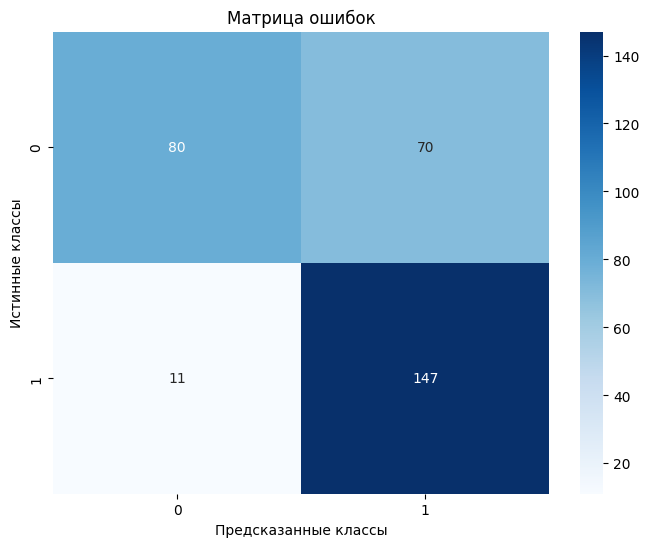

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


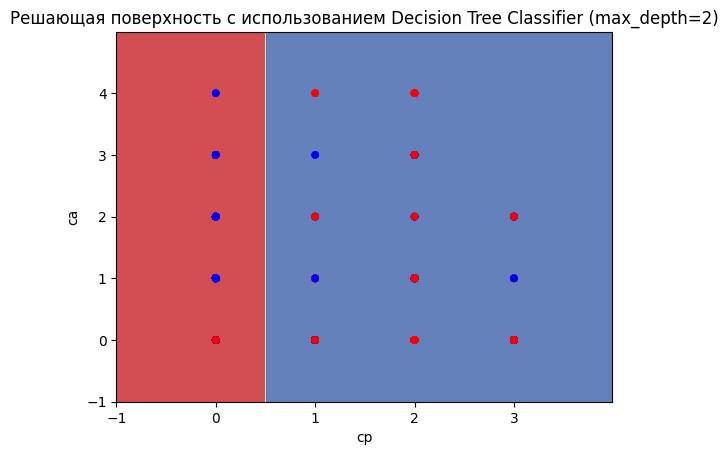

In [ ]:
# Классификатор DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Разделение на признаки и целевую переменную
X = heart_data[['cp', 'ca']] # Берем только два признака (cp и ca)
y = heart_data['target']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Создание и обучение модели
# Создание модели с ограничением глубины
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Оценим качество модели
accuracyDT = accuracy_score(y_test, y_pred)
conf_matrixDT = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracyDT:.3f}')
print("Confusion Matrix:\n", conf_matrixDT)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
target_names = heart_data['target'].unique()
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrixDT, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

# Визуализация решающей поверхности для первых двух признаков
x_min, x_max = X['cp'].min() - 1, X['cp'].max() + 1
y_min, y_max = X['ca'].min() - 1, X['ca'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X['cp'], X['ca'], c=y, cmap=plt.cm.bwr, s=20)
plt.xlabel('cp')
plt.ylabel('ca')
plt.title('Решающая поверхность с использованием Decision Tree Classifier (max_depth=2)')
plt.show()